# Module 19 - Clustering Models 

**_Author: Mona Khalil_**

**_Reviewer: Jessica Cervi_**

**Expected time = 2.5 hours**

**Total points = 100 points**


## Assignment Overview


At this point in the course, you're familiar with the use of classification models to predict group assignment in a data set. Often, however, your data set does not contain predefined groups to sort records. You may instead want to determine if there are any groups that organically form within your data. This is where _clustering methods_ offer a valuable tool in your data science toolbox.

**_Clustering_** methods are an example of _unsupervised learning_ , which is a class of machine learning algorithms used to draw inferences about _unlabeled data_. When your goal is to sort data points based on similar characteristics in order to create labels for future use, clustering methods are an excellent exploratory step to include in your machine learning workflow.

In this assignment, you will implement two commonly used clustering methods -- a hierarchical (or agglomerative) cluster analysis and k-means cluster analysis. You will learn how to determine the optimal number of clusters for grouping your data, and how to define and interpret the data points in each cluster.

This assignment is designed to build your familiarity and comfort coding in Python while also helping you review key topics from each module. As you progress through the assignment, answers will get increasingly complex. It is important that you adopt a data scientist's mindset when completing this assignment. Remember to run your code from each cell before submitting your assignment. Running your code beforehand will notify you of errors and give you a chance to fix them before submitting. You should view your Vocareum submission as if you are delivering a final project to your manager or client.

**Vocareum Tips**
   - Do not add arguments or options to functions unless you are specifically asked to. This will cause an error in Vocareum.
   - Do not use a library unless you are expicitly asked to in the question.


### Learning Objectives

- Apply K-means clustering to sample data
- Apply hierarchical clustering to a new data set
- Compare the two algorithms and draw conclusions


## Index:

#### Module 19: Clustering Methods

- [Question 1](#q1)
- [Question 2](#q2)
- [Question 3](#q3)
- [Question 4](#q4)
- [Question 5](#q5)
- [Question 6](#q6)
- [Question 7](#q7)
- [Question 8](#q8)
- [Question 9](#q9)
- [Question 10](#q10)



# Module 19 - Clustering Models


### Getting and Preparing the Data

We'll be working with a data set of [public employee compensation in San Francisco](http://data.world/data-society/employee-compensation-in-sf) retrieved from [data.world](http://data.world/). The data set contains a number of columns about the type of employment, location, department, salary, and benefits that we can use to explore a few key questions:
- Are there organically occurring clusters of employees based on salary, benefits, and union membership?
- If so, where do these clusters tend to be located (i.e., which department, which location, and which levels of seniority)?

Let's import the data set, `employee_compensation.csv`, as `sf`. Take a look at the first few rows of the data set after importing it.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
sf = pd.read_csv('./data/employee_compensation.csv')
sf.head()

,year_type,year,organization_group_code,organization_group,department_code,department,union_code,union,job_family_code,job_family,...,employee_identifier,salaries,overtime,other_salaries,total_salary,retirement,health_dental,other_benefits,total_benefits,total_compensation
0,Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,253,"Transport Workers - Transit Operators, Local 2...",9100,Street Transit,...,4273,44381.77,11166.58,2694.49,58242.84,13602.20,8826.10,4423.70,26852.00,85094.84
1,Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",9100,Street Transit,...,34336,62811.00,7539.33,8382.41,78732.74,14020.17,12424.50,6469.20,32913.87,111646.61
2,Calendar,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",2700,Housekeeping & Laundry,...,9890,34355.95,540.07,2783.39,37679.41,5935.65,9157.09,2843.73,17936.47,55615.88
3,Fiscal,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,...,29625,42915.13,251.92,271.44,43438.49,9640.21,8668.97,3512.85,21822.03,65260.52
4,Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,...,44400,45205.96,0.00,4380.23,49586.19,10134.36,8987.93,4093.31,23215.60,72801.79


In [49]:
sf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11545 entries, 0 to 11544
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year_type                11545 non-null  object 
 1   year                     11545 non-null  int64  
 2   organization_group_code  11545 non-null  int64  
 3   organization_group       11545 non-null  object 
 4   department_code          11545 non-null  object 
 5   department               11545 non-null  object 
 6   union_code               11545 non-null  int64  
 7   union                    11545 non-null  object 
 8   job_family_code          11545 non-null  int64  
 9   job_family               11545 non-null  object 
 10  job_code                 11545 non-null  int64  
 11  job                      11545 non-null  object 
 12  employee_identifier      11545 non-null  int64  
 13  salaries                 11545 non-null  float64
 14  overtime              

As you can see, the data set contains a total of 22 columns, including several columns about the department, job title, and union membership for each employee as well as multiple forms of compensation received throughout the year. The columns that show the breakdown of compensation are excellent candidates for a cluster analysis. First, however, we need to perform some preprocessing on the columns we will be using -- `salaries`, `overtime` `retirement`, and `health_dental`.

In statistics, **imputation** is the process of replacing missing data with substituted values. A very popular technique used to impute values is by filling any missing values in numeric columns with the mean of their respective column.  Mean imputation is one of the most ‘naïve’ imputation methods because unlike more complex methods like k-nearest neighbors imputation, it does not use the information we have about an observation to estimate a value for it.

[Back to top](#Index:) 
<a id='q1'></a>

### Question 1

**10 points**

Define a function `ans1` that:
- Accepts a dataframe as an argument, defaulting to the `sf` dataframe
- Returns a dataframe with any missing values in numeric columns with the mean of their respective column


In [50]:
sf

,year_type,year,organization_group_code,organization_group,department_code,department,union_code,union,job_family_code,job_family,...,employee_identifier,salaries,overtime,other_salaries,total_salary,retirement,health_dental,other_benefits,total_benefits,total_compensation
0,Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,253,"Transport Workers - Transit Operators, Local 2...",9100,Street Transit,...,4273,44381.77,11166.58,2694.49,58242.84,13602.20,8826.10,4423.70,26852.00,85094.84
1,Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",9100,Street Transit,...,34336,62811.00,7539.33,8382.41,78732.74,14020.17,12424.50,6469.20,32913.87,111646.61
2,Calendar,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",2700,Housekeeping & Laundry,...,9890,34355.95,540.07,2783.39,37679.41,5935.65,9157.09,2843.73,17936.47,55615.88
3,Fiscal,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,...,29625,42915.13,251.92,271.44,43438.49,9640.21,8668.97,3512.85,21822.03,65260.52
4,Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,...,44400,45205.96,0.00,4380.23,49586.19,10134.36,8987.93,4093.31,23215.60,72801.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11540,Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,200,"Transportation Workers, Local 200",9100,Street Transit,...,1849,79833.80,11649.70,5713.83,97197.33,17532.04,12424.50,8051.13,38007.67,135205.00
11541,Fiscal,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,253,"Transport Workers - Transit Operators, Local 2...",9100,Street Transit,...,26680,17069.19,1926.96,500.59,19496.74,4946.12,5400.32,1483.79,11830.23,31326.97
11542,Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,351,Municipal Executive Association - Miscellaneous,9100,Street Transit,...,25074,107961.19,0.00,0.00,107961.19,21264.51,10035.18,14072.58,45372.27,153333.46
11543,Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",1400,"Clerical, Secretarial & Steno",...,31609,36012.00,79.78,0.00,36091.78,8483.19,10035.18,2909.69,21428.06,57519.84


In [51]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11545 entries, 0 to 11544
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year_type                11545 non-null  object 
 1   year                     11545 non-null  int64  
 2   organization_group_code  11545 non-null  int64  
 3   organization_group       11545 non-null  object 
 4   department_code          11545 non-null  object 
 5   department               11545 non-null  object 
 6   union_code               11545 non-null  int64  
 7   union                    11545 non-null  object 
 8   job_family_code          11545 non-null  int64  
 9   job_family               11545 non-null  object 
 10  job_code                 11545 non-null  int64  
 11  job                      11545 non-null  object 
 12  employee_identifier      11545 non-null  int64  
 13  salaries                 11545 non-null  float64
 14  overtime              

In [52]:
sf.fillna(sf.mean(), inplace=True)

In [53]:
### YOUR SOLUTION HERE
def ans1(df=sf):
    
    df.fillna(df.mean(), inplace=True)
    
    return df

###
### YOUR CODE HERE
###


In [54]:
ans1(sf)

,year_type,year,organization_group_code,organization_group,department_code,department,union_code,union,job_family_code,job_family,...,employee_identifier,salaries,overtime,other_salaries,total_salary,retirement,health_dental,other_benefits,total_benefits,total_compensation
0,Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,253,"Transport Workers - Transit Operators, Local 2...",9100,Street Transit,...,4273,44381.77,11166.58,2694.49,58242.84,13602.20,8826.10,4423.70,26852.00,85094.84
1,Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",9100,Street Transit,...,34336,62811.00,7539.33,8382.41,78732.74,14020.17,12424.50,6469.20,32913.87,111646.61
2,Calendar,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",2700,Housekeeping & Laundry,...,9890,34355.95,540.07,2783.39,37679.41,5935.65,9157.09,2843.73,17936.47,55615.88
3,Fiscal,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,...,29625,42915.13,251.92,271.44,43438.49,9640.21,8668.97,3512.85,21822.03,65260.52
4,Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,...,44400,45205.96,0.00,4380.23,49586.19,10134.36,8987.93,4093.31,23215.60,72801.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11540,Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,200,"Transportation Workers, Local 200",9100,Street Transit,...,1849,79833.80,11649.70,5713.83,97197.33,17532.04,12424.50,8051.13,38007.67,135205.00
11541,Fiscal,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,253,"Transport Workers - Transit Operators, Local 2...",9100,Street Transit,...,26680,17069.19,1926.96,500.59,19496.74,4946.12,5400.32,1483.79,11830.23,31326.97
11542,Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,351,Municipal Executive Association - Miscellaneous,9100,Street Transit,...,25074,107961.19,0.00,0.00,107961.19,21264.51,10035.18,14072.58,45372.27,153333.46
11543,Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",1400,"Clerical, Secretarial & Steno",...,31609,36012.00,79.78,0.00,36091.78,8483.19,10035.18,2909.69,21428.06,57519.84


In [55]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q2'></a>


### Question 2

**10 points**

Since cluster analyses are primarily used as an exploratory procedure, we don't need to split our dataframe into `X` and `y`. You will also rarely have to split your data into a training and test set. We do, however, need to separate our columns of interest into their own frame, `X`.


Write a function `ans2` that
- Accepts a dataframe as an argument, defaulting to the sf dataframe
- Returns a dataframe with only our 3 columns of interest:
    - `salaries`
    - `overtime`, and 
    - `health_dental`

In [56]:
### YOUR SOLUTION HERE
def ans2(df=sf):
    
    return df[['salaries','overtime','health_dental']]

###
### YOUR CODE HERE
###


In [57]:
ans2(sf)

,salaries,overtime,health_dental
0,44381.77,11166.58,8826.10
1,62811.00,7539.33,12424.50
2,34355.95,540.07,9157.09
3,42915.13,251.92,8668.97
4,45205.96,0.00,8987.93
...,...,...,...
11540,79833.80,11649.70,12424.50
11541,17069.19,1926.96,5400.32
11542,107961.19,0.00,10035.18
11543,36012.00,79.78,10035.18


In [58]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id="types"></a>
## Types of Clustering Models
There are dozens of clustering algorithms commonly used to determine how and where your data points are 'similar' in nature. Two common classes of algorithms include _connectivity models_ and _centroid models_. 

**Connectivity models** cluster data points based on how close they are to each other in linear space. Algorithms used in connectivity models either start with all data points as their own clusters, connecting nearby data points with each iteration; or, start with one cluster and divide data points based on distance. _Distance_ is determined by a number of different algorithms. _Hierarchical cluster analysis_ is one of the most commonly used connectivity models.

**Centroid models** cluster data points based on their closeness to a specified number of centroids set in your analysis. These centroids are points randomly assigned in linear space, used as a reference point to calculate the distance of data points, and iterated over until the optimal centroid locations are determined for the specified number of clusters. The most commonly used centroid model is _K-means cluster analysis_.

### Hierarchical Cluster Analysis

**Hierarchical clustering** is a connectivity model that creates a _hierarchy_ of clusters. Each data point begins as its own cluster; with each iteration, the two nearest clusters are combined until all data points are incorporated into a single cluster. Hierarchical clustering can be implemented using the described approach (bottom-up), or using a top-down approach (starting with one cluster and breaking apart clusters until each data point is its own cluster). 

Additionally, there are a number of algorithms that can be used to determine "distance" between two clusters -- Euclidean distance, Squared Euclidean distance, Manhattan distance, Maximum distance, and Mahalanobis distance. We will primarily use Euclidean distance in this assignment, but we highly recommend that you explore the performance of multiple distance algorithms when using a hierarchical cluster analysis.

We'll be implementing our hierarchical cluster analysis using the `scipy` library, as it offers a number of easy and effective ways to evaluate the results of your analysis. Let's import `dendrogram` and `linkage` from `from scipy.cluster.hierarchy`.

In [59]:
from scipy.cluster.hierarchy import dendrogram, linkage

We will then need to specify one argument for our hierarchical clustering linkage, telling the algorithm how our data points are connected. We'll use the `'ward'` method.

You can read more about the arguments for `linkage` available in the [scipy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).

In [60]:
hc = linkage(ans2(), 'ward')
hc

array([[8.65000000e+02, 9.88400000e+03, 0.00000000e+00, 2.00000000e+00],
       [9.00000000e+00, 2.24600000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.55400000e+03, 5.86500000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [2.30770000e+04, 2.30800000e+04, 1.21594995e+06, 4.01500000e+03],
       [2.30820000e+04, 2.30850000e+04, 1.73562468e+06, 7.53000000e+03],
       [2.30860000e+04, 2.30870000e+04, 3.38706265e+06, 1.15450000e+04]])

We can then evaluate our hierarchical cluster analysis using a _dendrogram_ -- a plot showing how and where clusters are combined. Using the results of the `linkage` and the `dendrogram` method, we can easily generate a plot using `scipy`. 

Let's specify a few arguments to best view the plot in a Jupyter Notebook -- we'll widen the plot, set the orientation to `top`, and set the distance sort to `descending`.

We'll need to import `matplotlib.pyplot` in order to generate this plot. Please note that this plot may take a few moments to render.

In [61]:
from matplotlib import pyplot as plt

# Set the plot size
plt.figure(figsize=(25, 10))

# Create the dendrogram
# dendrogram(hc,
#            orientation='top',
#            distance_sort='descending')

# # Display the plot
# plt.show()

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

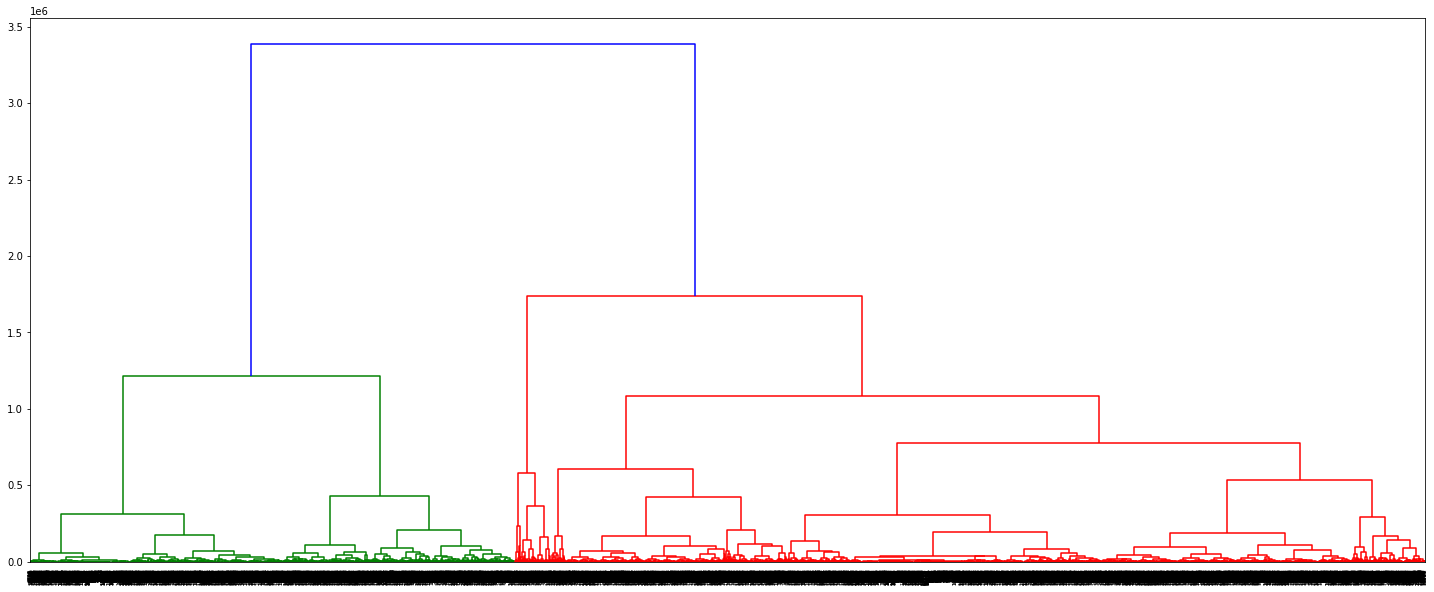

In [62]:
from matplotlib import pyplot as plt

# Set the plot size
plt.figure(figsize=(25, 10))

# Create the dendrogram
dendrogram(hc,
           orientation='top',
           distance_sort='descending')

# Display the plot
plt.show()

<a id="dendrogram"></a>
#### Evaluating the Dendrogram

We're going to evaluate the dendrogram's horizontal and vertical lines to determine an appropriate number of clusters for our model. Every vertical line represents a cluster, and every horizontal line represents where a cluster is merging with another. Starting from the bottom, you can see that the further the distance increases on the y-axis (the higher up you go), the more clusters merge together - eventually becoming one single cluster.

Determining an appropriate number of clusters is a largely subjective decision. You'll notice an approximate location on the y-axis where the vertical lines become longer, indicating a larger distance between clusters being combined. We can estimate that a distance between 750,000 and 1,000,000 may be an appropriate threshold for determining a good fit for a number of clusters. This would put us between 4 and 6 clusters as an appropriate number to group our data.

Since we have a sufficiently large data set (~10,000 observations), let's use 5 clusters and recompute our results, specifying the maximum number of clusters to merge into. We can do this using `fcluster` from `scipy.hierarchy`. 

In [63]:
from scipy.cluster.hierarchy import fcluster

We'll set our max depth to 1,000,000 and our criterion as 'distance'.

In [64]:
max_d = 1000000
clusters = fcluster(hc, max_d, criterion='distance')

In [65]:
len(clusters)

11545

[Back to top](#Index:) 
<a id='q3'></a>


### Question 3

**10 points**

We can now assign the clusters to a new column in our original data set, called `hc_clusters`. We will compare the results from our hierarchical cluster assignments to k-means cluster assignments later on.


Write a function `ans3` that
- Accepts a dataframe as an argument, defaulting to the sf dataframe
- Creates a new column in this dataframe titled `hc_clusters`
- Inserts the array `clusters` into this new column
- Returns the resultant dataframe

In [66]:
sf['hc_clusters'] = clusters

In [67]:
sf['hc_clusters'].value_counts()

5    5283
1    2091
4    1950
2    1924
3     297
Name: hc_clusters, dtype: int64

In [68]:
### YOUR SOLUTION HERE
def ans3(df=sf):
    df['hc_clusters'] = clusters
    return df

###
### YOUR CODE HERE
###


In [69]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q4'></a>

### Question 4

**5 points**



Observe the dendrogram above. How many clusters will we retain if we set our `max_d` (max distance) to 1,500,000? Assign your answer to `ans4` below as an integer.

In [70]:
max_d = 1_500_000
clusters = fcluster(hc, max_d, criterion='distance')

In [71]:
len(set(clusters))

3

In [72]:
### YOUR SOLUTION HERE
ans4 = None

###
### YOUR CODE HERE
###


In [73]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id="k-means"></a>
### K-Means Cluster Analysis

The other common clustering algorithm is the **k-means cluster analysis**. K-means cluster analysis is a _centroid_ model that aims to find the best location for a specified number of centroids, K, to cluster nearby data points. A k-means cluster analysis occurs in 6 steps:

1. Specify the desired number of clusters (we'll review a method for determining the best value for K).
2. Randomly assign data points into one of the K clusters.
3. Determine the centroid (central point between all data points) based on the random cluster assignment.
4. Reassign data points to the nearest centroid.
5. Re-compute the centroid.
6. Repeat steps 4 and 5 until the model converges (the model no longer improves by further data point reassignment).

#### When is this useful?

K-means cluster analysis is an easy to implement algorithm that can help you find meaning in data sets that don't have pre-existing groups or labels. The k-means clustering algorithm is better able to draw conclusions based on large data sets, so it's often preferred to hierarchical clustering when you have more than few thousand records in your data set. 

#### How many clusters?

A K-means cluster analysis requires that you specify the number of centroids used to cluster your data. However, you first need to determine the appropriate value for K based on your data set. We'll use the _elbow method_ below to evaluate the fit of a K-means clustering analysis with a range of cluster values. 

This is accomplished using the following steps: 
- Initiate an empty list to append _within cluster sum of squares_ values
- Using a for loop, fit a K-means cluster analysis for a range of values. We'll use values 1 through 10 in this iteration. We recommend a similar range, unless you're working with a very large data set (i.e., several million rows). In that case, you may want to increase your range.
- Append the `inertia` value (within clusters sum of squares) to the list.
- Plot the within cluster sum of squares for each number of clusters.

Let's start by importing `KMeans` from scikit-learn. You'll notice we've switched to scikit-learn after using scipy. You can use either library based on your preference. However, it is our belief that scipy is a more effective tool for implementing a hierarchical cluster analysis.

In [74]:
from sklearn.cluster import KMeans

We can then create our list, `w`, and perform our K-means cluster analyses for each number of clusters.

In [75]:
w = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 99)
    kmeans.fit(ans2())
    
    w.append(kmeans.inertia_)

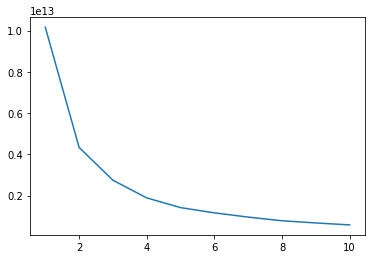

In [76]:
plt.plot(range(1,11), w);

<a id="elbow"></a>
#### Evaluating the Elbow Method

The above plot depicts the _within cluster sum of squares_ (WCSS) when our model is trained on 1 to 10 centroids using our data set. The WCSS is a measure of variability within an individual cluster. A lower WCSS value indicates that data in our clusters is more uniform, and likely represents meaningful differences in the data. 

The _elbow_ of our plot, above identifies the approximate point where adding more clusters leads to diminishing returns in reducing within-cluster error. Based on visual observation, our elbow appears between 3 and 5 clusters. Ultimately, the most appropriate number of clusters depends on your machine learning/analytics needs. Let's perform a k-means cluster analysis on our data, specifying that we want to use 3 clusters on our data. We'll use `kmeans.fit_predict` instead of `kmeans.fit` in order to save our clusters back to the original data set.

In [77]:
kmeans_3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 99)
clusters_3 = kmeans_3.fit_predict(ans2())
print(clusters_3)

[0 0 1 ... 2 1 0]


We can then save the clusters as a new column in `X`. Once we decide on the optimal number of clusters, we will save the final iteration to `sf`.

In [78]:
X = ans2().copy()
X['cluster_3'] = clusters_3
X.head()

,salaries,overtime,health_dental,cluster_3
0,44381.77,11166.58,8826.10,0
1,62811.00,7539.33,12424.50,0
2,34355.95,540.07,9157.09,1
3,42915.13,251.92,8668.97,0
4,45205.96,0.00,8987.93,0


<a id="eval-k"></a>
#### Evaluating Clusters

As we've highlighted earlier, evaluating the appropriate number of clusters for your data is largely a subjective process. We'll perform a number of steps to start investigating the value created by grouping data according to the number of k-means centroids specified. Let's start by grouping `X` by the `cluster_3` and calculating the mean of the 3 columns and number of data points in each cluster.

In [79]:
cluster_3_grp = X.groupby('cluster_3').agg(['mean', 'count'])
cluster_3_grp

salaries            overtime       health_dental      
                    mean count          mean count          mean count
cluster_3                                                             
0           59858.323106  7717   8333.705234  7717  12158.181230  7717
1           15095.376750  3286   1297.877864  3286   3667.554680  3286
2          115732.735959   542  15141.441919   542  12294.956587   542

With 3 clusters, we can see a drastic difference in the salaries across each group. Cluster 1 has the lowest salary, overtime, and the least health/dental benefits. Cluster 2 has the highest salary, and likely represents the management tiers of San Francisco city government. 

Now, let's take a look at the data using 3 scatterplots representing all combinations of 2 columns used in the analysis. We can easily do this using the `seaborn` library as part of 3 `matplotlib` subplots.

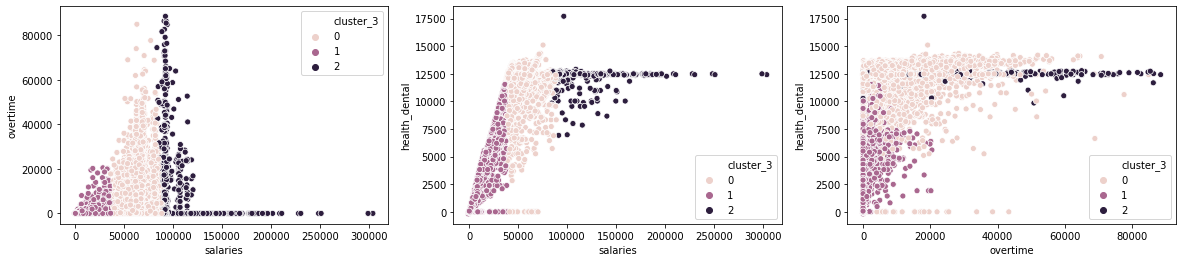

In [80]:
# Set up the axes and figure size
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figwidth(20)

# Create 3 scatterplot colored by cluster
sns.scatterplot(x = 'salaries', y = 'overtime', hue = 'cluster_3', data = X, ax = ax1)
sns.scatterplot(x = 'salaries', y = 'health_dental', hue = 'cluster_3', data = X, ax = ax2)
sns.scatterplot(x = 'overtime', y = 'health_dental', hue = 'cluster_3', data = X, ax = ax3);

As you'll notice, the algorithm has a clear line dividing the data points based on salary, capturing a large number of high salary employees. However, you'll notice that, on the X-axis, employees whose salaries exceed a cutoff (approximately 125,000) no longer receive overtime. This is _not_ captured with only 3 clusters, and therefore, we may be missing valuable information about our data.

[Back to top](#Index:) 
<a id='q5'></a>

### Question 5

**10 points**


Write a function `ans5` that
- Accepts a dataframe, defaulting to `X`, as input
- Predicts cluster assignments on this input dataframe with the following parameters:
    - `n_clusters=4`
    - `init='k-means++'`
    - `random_state=99`
- Returns the original dataframe, with a new column `cluster_4` appended to it, containing the cluster labels

In [81]:
X

,salaries,overtime,health_dental,cluster_3
0,44381.77,11166.58,8826.10,0
1,62811.00,7539.33,12424.50,0
2,34355.95,540.07,9157.09,1
3,42915.13,251.92,8668.97,0
4,45205.96,0.00,8987.93,0
...,...,...,...,...
11540,79833.80,11649.70,12424.50,0
11541,17069.19,1926.96,5400.32,1
11542,107961.19,0.00,10035.18,2
11543,36012.00,79.78,10035.18,1


In [82]:
### YOUR SOLUTION HERE
def ans5(df=X):
    
    kmeans_4 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 99)
    clusters_4 = kmeans_4.fit_predict(ans2())
    df['cluster_4'] = clusters_4
    
    return df

###
### YOUR CODE HERE
###


In [83]:
ans5(X)

,salaries,overtime,health_dental,cluster_3,cluster_4
0,44381.77,11166.58,8826.10,0,3
1,62811.00,7539.33,12424.50,0,3
2,34355.95,540.07,9157.09,1,3
3,42915.13,251.92,8668.97,0,3
4,45205.96,0.00,8987.93,0,3
...,...,...,...,...,...
11540,79833.80,11649.70,12424.50,0,0
11541,17069.19,1926.96,5400.32,1,1
11542,107961.19,0.00,10035.18,2,2
11543,36012.00,79.78,10035.18,1,3


In [84]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q6'></a>

### Question 6

**10 points**


Write a function `ans6` that
- Accepts as an argument the dataframe `X` from the previous question
- Calculates the mean and count of each column (salaries, overtime, and health_dental) in `X` using `cluster_4` as a group category
        - Hint: You will get 1 more column than last time, as the mean/count of `cluster_3` will also be calculated (and can be disregarded).
- Returns the result as a dataframe

In [85]:
X.groupby('cluster_4').agg(['mean', 'count'])

salaries            overtime       health_dental        \
                    mean count          mean count          mean count   
cluster_4                                                                
0           69201.611670  3550  16742.682504  3550  12740.403552  3550   
1           12869.929084  2958   1100.673276  2958   3139.216755  2958   
2          136290.611076   288   3407.757222   288  12223.100833   288   
3           52910.204812  4749   2760.358591  4749  11477.289301  4749   

          cluster_3        
               mean count  
cluster_4                  
0          0.143099  3550  
1          1.000000  2958  
2          2.000000   288  
3          0.069067  4749

In [86]:
### YOUR SOLUTION HERE
def ans6(df=X):
    return df.groupby('cluster_4').agg(['mean', 'count'])

###
### YOUR CODE HERE
###


In [87]:
ans6(X)

salaries            overtime       health_dental        \
                    mean count          mean count          mean count   
cluster_4                                                                
0           69201.611670  3550  16742.682504  3550  12740.403552  3550   
1           12869.929084  2958   1100.673276  2958   3139.216755  2958   
2          136290.611076   288   3407.757222   288  12223.100833   288   
3           52910.204812  4749   2760.358591  4749  11477.289301  4749   

          cluster_3        
               mean count  
cluster_4                  
0          0.143099  3550  
1          1.000000  2958  
2          2.000000   288  
3          0.069067  4749

In [88]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Finally, let's visualize our model with 4 cluster centroids.

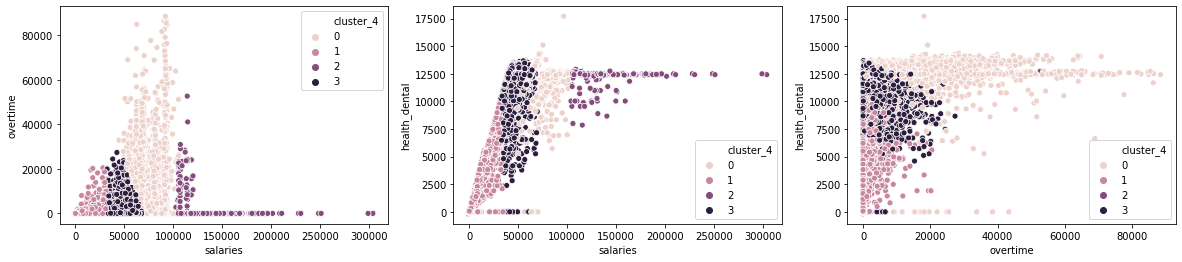

In [89]:
# Set up the axes and figure size
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figwidth(20)

# Create 3 scatterplot colored by cluster
sns.scatterplot(x = 'salaries', y = 'overtime', hue = 'cluster_4', data = X, ax = ax1)
sns.scatterplot(x = 'salaries', y = 'health_dental', hue = 'cluster_4', data = X, ax = ax2)
sns.scatterplot(x = 'overtime', y = 'health_dental', hue = 'cluster_4', data = X, ax = ax3);

As you can see, the k-means model with 4 centroids captures more nuance in the salary and overtime data. You'll notice, however, that there are still multiple clusters with similar health and dental coverage. 

You'll also notice the difference in the number of data points in each cluster -- cluster 3 includes only 286 data points, compared to the other clusters that include multiple thousands.

Finally, let's evaluate a model with 5 clusters.

[Back to top](#Index:) 
<a id='q7'></a>

### Question 7

**10 points**


Write a function `ans7` that
- Accepts as an argument the dataframe `X` from the output of question 5
- Repeats the process of fitting a k-means algorithm using 5 clusters
        - Use the following parameters:
            - `n_clusters=5`
            - `init='k-means++'`
            - `random_state=99`
- Appends the cluster label assignments to a new column `clusters_5`
- Returns the result as a dataframe

In [90]:
### YOUR SOLUTION HERE
def ans7(df=X):
    
    kmeans_5 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 99)
    clusters_5 = kmeans_5.fit_predict(ans2())
    df['cluster_5'] = clusters_5
    
    return df

###
### YOUR CODE HERE
###


In [91]:
ans7(X)

,salaries,overtime,health_dental,cluster_3,cluster_4,cluster_5
0,44381.77,11166.58,8826.10,0,3,4
1,62811.00,7539.33,12424.50,0,3,0
2,34355.95,540.07,9157.09,1,3,4
3,42915.13,251.92,8668.97,0,3,4
4,45205.96,0.00,8987.93,0,3,4
...,...,...,...,...,...,...
11540,79833.80,11649.70,12424.50,0,0,2
11541,17069.19,1926.96,5400.32,1,1,1
11542,107961.19,0.00,10035.18,2,2,3
11543,36012.00,79.78,10035.18,1,3,4


In [92]:
X

,salaries,overtime,health_dental,cluster_3,cluster_4,cluster_5
0,44381.77,11166.58,8826.10,0,3,4
1,62811.00,7539.33,12424.50,0,3,0
2,34355.95,540.07,9157.09,1,3,4
3,42915.13,251.92,8668.97,0,3,4
4,45205.96,0.00,8987.93,0,3,4
...,...,...,...,...,...,...
11540,79833.80,11649.70,12424.50,0,0,2
11541,17069.19,1926.96,5400.32,1,1,1
11542,107961.19,0.00,10035.18,2,2,3
11543,36012.00,79.78,10035.18,1,3,4


In [93]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#Index:) 
<a id='q8'></a>

### Question 8

**10 points**


Write a function `ans8` that
- Accepts the output dataframe of `ans7` as an argument
- Calculates the mean and count of the `salaries`, `overtime`, and `health_dental` columns, grouping by `cluster_5`
- Return the results as a dataframe

In [94]:
### YOUR SOLUTION HERE
def ans8(df=ans7()):
    
    df = df[['salaries', 'overtime','health_dental','cluster_5']]

    return df.groupby('cluster_5').agg(['mean', 'count'])


###
### YOUR CODE HERE
###


In [95]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Finally, let's visualize a k-means cluster analysis with 5 cluster centroids.

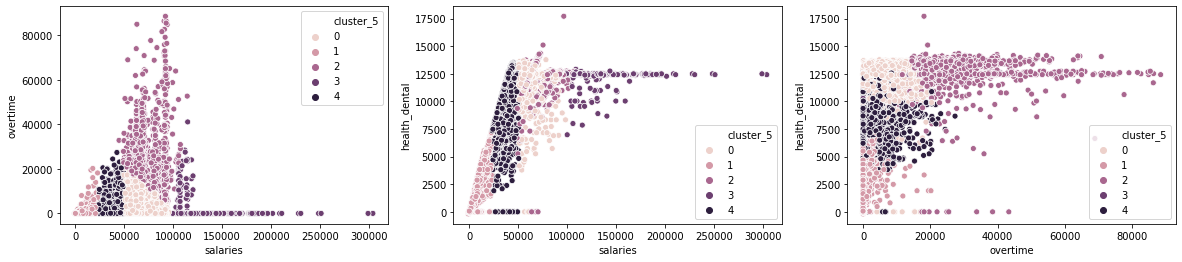

In [96]:
# Set up the axes and figure size
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figwidth(20)

# Create 3 scatterplot colored by cluster
X = ans7()
sns.scatterplot(x = 'salaries', y = 'overtime', hue = 'cluster_5', data = X, ax = ax1, legend='full')
sns.scatterplot(x = 'salaries', y = 'health_dental', hue = 'cluster_5', data = X, ax = ax2, legend='full')
sns.scatterplot(x = 'overtime', y = 'health_dental', hue = 'cluster_5', data = X, ax = ax3, legend='full');

Visually, it seems that the addition of a 5th cluster has split the lowest salary/overtime group into one with a mean salary of 9,074 and another with a mean salary of 38,610. There is a good chance that this split has separated part time workers from low wage/full time workers.

[Back to top](#Index:) 
<a id='q9'></a>

### Question 9

**5 points**

How many clusters would you select to best understand meaningful groups/tiers of pay within San Francisco city government? Assign the number as an integer to `ans9`.

In [97]:
### YOUR SOLUTION HERE
ans9 = 5

###
### YOUR CODE HERE
###


In [98]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id="compare"></a>
### Comparing Hierarchical and K-Means Clusters

We have two sets of clusters assigned to our original data set for comparison. Let's explore some aggregates/trends for each set of clusters to draw conclusions about our original data set. We'll start by creating a scatterplot of the `salaries` and `overtime` data for each type of cluster.

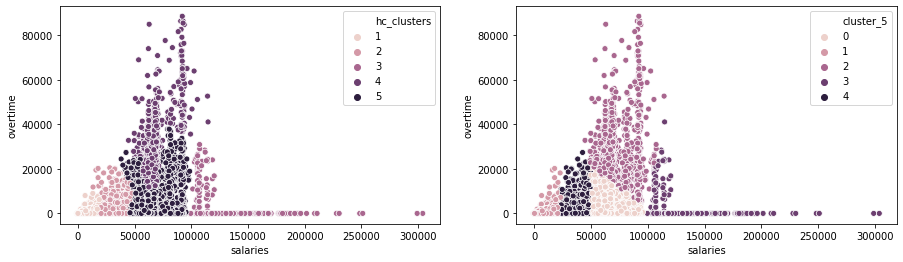

In [99]:
# Set up the axes and figure size
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(15)

# Create 3 scatterplot colored by cluster
sns.scatterplot(x = 'salaries', y = 'overtime', hue = 'hc_clusters', data = sf, ax = ax1, legend = 'full')
sns.scatterplot(x = 'salaries', y = 'overtime', hue = 'cluster_5', data = X, ax = ax2, legend = 'full');

[Back to top](#Index:) 
<a id='q10'></a>


### Question 10

**20 points**

Finally, write two functions:

- `ans10_hc`
    - Accepts the `sf` dataframe as a default
- `ans10_km`
    - Accepts the `X` dataframe as a default
- Both functions should group the data by each set of clusters and calculate the count/mean for `salaries`, `overtime`, and `health_dental`
- Return the resulting dataframes

In [100]:
sf

,year_type,year,organization_group_code,organization_group,department_code,department,union_code,union,job_family_code,job_family,...,salaries,overtime,other_salaries,total_salary,retirement,health_dental,other_benefits,total_benefits,total_compensation,hc_clusters
0,Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,253,"Transport Workers - Transit Operators, Local 2...",9100,Street Transit,...,44381.77,11166.58,2694.49,58242.84,13602.20,8826.10,4423.70,26852.00,85094.84,2
1,Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",9100,Street Transit,...,62811.00,7539.33,8382.41,78732.74,14020.17,12424.50,6469.20,32913.87,111646.61,5
2,Calendar,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",2700,Housekeeping & Laundry,...,34355.95,540.07,2783.39,37679.41,5935.65,9157.09,2843.73,17936.47,55615.88,2
3,Fiscal,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,...,42915.13,251.92,271.44,43438.49,9640.21,8668.97,3512.85,21822.03,65260.52,2
4,Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,...,45205.96,0.00,4380.23,49586.19,10134.36,8987.93,4093.31,23215.60,72801.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11540,Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,200,"Transportation Workers, Local 200",9100,Street Transit,...,79833.80,11649.70,5713.83,97197.33,17532.04,12424.50,8051.13,38007.67,135205.00,5
11541,Fiscal,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,253,"Transport Workers - Transit Operators, Local 2...",9100,Street Transit,...,17069.19,1926.96,500.59,19496.74,4946.12,5400.32,1483.79,11830.23,31326.97,1
11542,Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,351,Municipal Executive Association - Miscellaneous,9100,Street Transit,...,107961.19,0.00,0.00,107961.19,21264.51,10035.18,14072.58,45372.27,153333.46,3
11543,Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",1400,"Clerical, Secretarial & Steno",...,36012.00,79.78,0.00,36091.78,8483.19,10035.18,2909.69,21428.06,57519.84,2


In [101]:
### YOUR SOLUTION HERE
def ans10_hc(df=sf):
    
    df = df[['salaries', 'overtime','health_dental','hc_clusters']]

    return df.groupby('hc_clusters').agg(['mean', 'count'])
    

def ans10_km(df=X):
    
    df = df[['salaries', 'overtime','health_dental','cluster_5']]

    return df.groupby('cluster_5').agg(['mean', 'count'])
###
### YOUR CODE HERE
###


In [102]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Let's compare the two aggregates below.

In [103]:
print(ans10_hc(), '\n\n', ans10_km())

                  salaries            overtime       health_dental      
                      mean count          mean count          mean count
hc_clusters                                                             
1              7414.436375  2091    491.587351  2091   1812.636533  2091
2             33699.468825  1924   3176.671305  1924   8110.973654  1924
3            135146.149226   297   3445.639899   297  12177.560034   297
4             66841.405149  1950  23746.597046  1950  12762.281487  1950
5             61222.169120  5283   4223.669779  5283  12235.702285  5283 

                 salaries            overtime       health_dental      
                    mean count          mean count          mean count
cluster_5                                                             
0           61723.259703  4976   4371.883073  4976  12338.618023  4976
1            9060.816305  2371    710.774230  2371   2246.933092  2371
2           69971.850985  1776  25717.934842  1776  12781.

There are 5 clusters in each model with different numerical values and slightly different count values. You'll notice that the k-means cluster analysis has clear linear divisions along the `salaries` column, whereas the hierarchical cluster analysis swaps many records from these two clusters in the middle. There are, however, similar cluster divisions on the high/low end of the salary and overtime distribution, suggesting that both models capture part time, low wage, and high wage workers fairly well.

<a id="limitations"></a>
## Limitations

Common clustering algorithms have a number of limitations to be aware of in their application and interpretation. 

### Hierarchical Clustering
Hierarchical clustering algorithms are very sensitive to outliers in the data. A small number of outliers can drastically alter cluster assignments. Before using a hierarchical cluster analysis, you may want to remove extreme outliers from your data set and perform some feature scaling.

Hierarchical cluster analyses are limited by earlier cluster assignments. Once data points are combined into clusters, they cannot be moved/reassigned -- even if that would optimize the final result.

Finally, hierarchical cluster analyses are not ideal for very large data sets. You may have noticed that the dendrogram took a while to render in this assignment. Larger data sets (i.e., hundreds of thousands/millions of records) may not be suitable for hierarchical clustering. 

### K-Means Clustering
As you noticed, k-means clustering requires more manual work, exploration, and judgment calls in order to determine the optimal number of clusters for your data set. Be prepared to perform a significant amount of manual data exploration in the process of performing a k-means cluster analysis.

Additionally, k-means cluster analyses are highly sensitive to feature scaling. Scaling your features prior to fitting your model may drastically alter your results. You may wish to compare the results of a k-means analysis with scaled/non-scaled features when determining the best cluster fit for your data.

In [104]:
import pandas as pd


sf = pd.DataFrame({'a': [1,2,3,1,2,3], 'b':[4,5,6,7,8,9]})
tf = pd.DataFrame({'a': [1,1,1,1,2,2], 'b':[4,5,6,7,8,9]})

In [105]:
sf

,a,b
0,1,4
1,2,5
2,3,6
3,1,7
4,2,8
5,3,9


In [106]:
def my_function(df=sf):
    return sf.groupby(['a']).agg(['mean', 'count'])





In [107]:
my_function(tf)

b      
  mean count
a           
1  5.5     2
2  6.5     2
3  7.5     2

In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# labels can be continuous or discrete or categorical
# just labels that we assign - does not meet 1 is greater than 0
# the task is to learn what the function that maps X - our features to Y
# The model can be parameterized - 

# Unsupervised we don't have labels - we don't have any - 